# SVM

O objetivo do algoritmo da máquina de vetores de suporte é encontrar um hiperplano em um espaço N-dimensional (N - o número de recursos) que classifica distintamente os pontos de dados.

![fig_1](https://miro.medium.com/max/600/0*9jEWNXTAao7phK-5.png)

![fig_2](https://miro.medium.com/max/600/0*0o8xIA4k3gXUDCFU.png)

Para separar as duas classes de pontos de dados, existem muitos hiperplanos possíveis que podem ser escolhidos. Nosso objetivo é encontrar um plano que tenha a margem máxima, ou seja, a distância máxima entre os pontos de dados de ambas as classes. Maximizar a distância da margem fornece algum reforço para que os pontos de dados futuros possam ser classificados com mais confiança.

## **Hiperplanos e vetores de suporte**

![fig_3](https://miro.medium.com/max/1400/1*ZpkLQf2FNfzfH4HXeMw4MQ.png)

Hiperplanos são limites de decisão que ajudam a classificar os pontos de dados. Os pontos de dados que caem em ambos os lados do hiperplano podem ser atribuídos a diferentes classes. Além disso, a dimensão do hiperplano depende do número de recursos. Se o número de recursos de entrada for 2, o hiperplano é apenas uma linha. Se o número de recursos de entrada for 3, o hiperplano se torna um plano bidimensional. Torna-se difícil imaginar quando o número de recursos excede 3.

![fig_4](https://miro.medium.com/max/700/0*ecA4Ls8kBYSM5nza.jpg)

Os vetores de suporte são pontos de dados que estão mais próximos do hiperplano e influenciam a posição e a orientação do hiperplano. Usando esses vetores de suporte, maximizamos a margem do classificador. A exclusão dos vetores de suporte mudará a posição do hiperplano. Esses são os pontos que nos ajudam a construir nosso SVM.

## **Intuição de grande margem**

Na regressão logística, pegamos a saída da função linear e comprimimos o valor dentro do intervalo de [0,1] usando a função sigmóide. Se o valor comprimido for maior do que um valor limite (0,5), atribuímos a ele um rótulo 1, caso contrário, atribuímos a ele um rótulo 0. No SVM, pegamos a saída da função linear e se essa saída for maior que 1, identificamos ele com uma classe e se a saída for -1, identificamos que é com outra classe. Uma vez que os valores de limiar são alterados para 1 e -1 em SVM, obtemos esta faixa de valores de reforço ([- 1,1]) que atua como margem.

## **Função de custo e atualizações de gradiente**

No algoritmo SVM, procuramos maximizar a margem entre os pontos de dados e o hiperplano. A função de perda que ajuda a maximizar a margem é a perda de dobradiça.

![fig_5](https://miro.medium.com/max/2080/1*3xErahGeTFnbDiRuNXjAuA.png)

O custo é 0 se o valor previsto e o valor real tiverem o mesmo sinal. Se não forem, calculamos o valor da perda. Também adicionamos um parâmetro de regularização à função de custo. O objetivo do parâmetro de regularização é equilibrar a maximização e a perda de margem. Depois de adicionar o parâmetro de regularização, as funções de custo têm a aparência abaixo.

![fig_6](https://miro.medium.com/max/1400/1*GQAd28bK8LKOL2kOOFY-tg.png)

Agora que temos a função de perda, tomamos as derivadas parciais em relação aos pesos para encontrar os gradientes. Usando os gradientes, podemos atualizar nossos pesos.

![fig_7](https://miro.medium.com/max/700/1*WUphtYLfTOAoaXQXvImBeA.png)

Quando não há nenhuma classificação incorreta, ou seja, nosso modelo prevê corretamente a classe de nosso ponto de dados, só temos que atualizar o gradiente do parâmetro de regularização.

![fig_8](https://miro.medium.com/max/308/1*-nKEXrWos8Iuf-DWSv_srQ.png)

Quando há uma classificação incorreta, ou seja, nosso modelo comete um erro na previsão da classe do nosso ponto de dados, incluímos a perda junto com o parâmetro de regularização para realizar a atualização do gradiente.

![fig_9](https://miro.medium.com/max/428/1*tnvMhAKaTUCO43diEvtTAQ.png)

## Em Python

In [5]:
import pandas as pd
from sklearn import datasets
df = pd.read_csv(r'C:\Users\mathe\OneDrive\Desktop\roteiro_de_estudos\5_classificacao\iris.csv')
df = df.drop(['Id'],axis=1)
target = df['Species']
s = set()
for val in target:
    s.add(val)
s = list(s)
rows = list(range(100,150))
df = df.drop(df.index[rows])

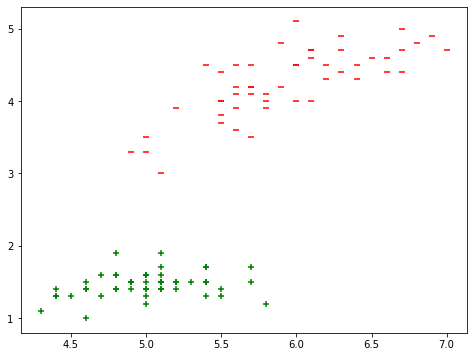

In [6]:

import matplotlib.pyplot as plt

x = df['SepalLengthCm']
y = df['PetalLengthCm']

setosa_x = x[:50]
setosa_y = y[:50]

versicolor_x = x[50:]
versicolor_y = y[50:]

plt.figure(figsize=(8,6))
plt.scatter(setosa_x,setosa_y,marker='+',color='green')
plt.scatter(versicolor_x,versicolor_y,marker='_',color='red')
plt.show()

In [8]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np
## Drop rest of the features and extract the target values
df = df.drop(['SepalWidthCm','PetalWidthCm'],axis=1)
Y = []
target = df['Species']
for val in target:
    if(val == 'Iris-setosa'):
        Y.append(-1)
    else:
        Y.append(1)
df = df.drop(['Species'],axis=1)
X = df.values.tolist()
## Shuffle and split the data into training and test set
X, Y = shuffle(X,Y)
x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

y_train = y_train.reshape(90,1)
y_test = y_test.reshape(10,1)

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0


C:\Users\mathe\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
